In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

from itertools import combinations, chain
from math import factorial as f

# Отбор признаков

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [88]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [4]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [5]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<Axes: xlabel='engine-type', ylabel='Count'>

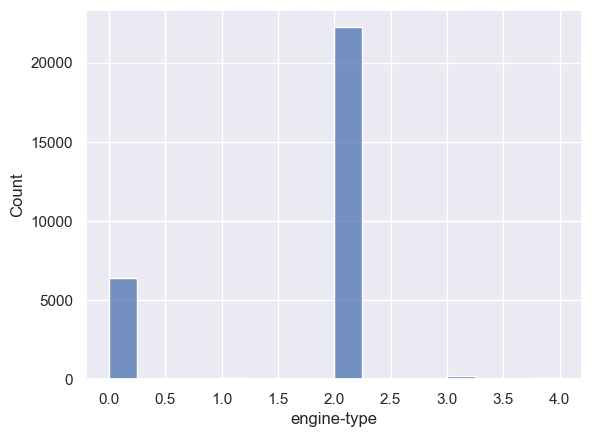

In [6]:
sns.histplot(data=train_X, x='engine-type')

In [ ]:
# sns.pairplot(train_X[numerical]);

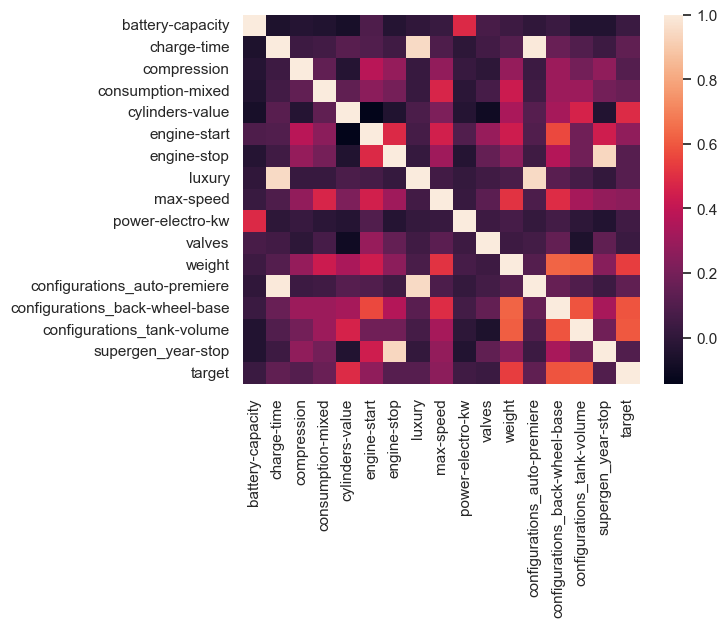

In [8]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));
train = train.drop(['target'], axis=1)

In [9]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train_y['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.1100375236095559 p-value: 9.725646829179841e-79


In [10]:
r = pearsonr(train['battery-capacity'], train_y['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667099642 p-value: 5.610547363570721e-05


## F-test

In [11]:
from sklearn.feature_selection import f_regression, SelectKBest

In [12]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\Anaconda\SDK\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 0.00000000e+000])

In [14]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\Anaconda\SDK\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.4300e+03],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  2.3000e+01,
         0.0000e+00,  2.4400e+03],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  1.0000e+01,
         0.0000e+00,  2.6850e+03],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ...,  2.6000e+01,
         0.0000e+00,  2.6700e+03],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.5000e+03],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  3.5000e+01,
         0.0000e+00,  2.8800e+03]])

In [15]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial', 'target'],
      dtype=object)

## Значения Шепли

In [91]:
import shap

In [92]:
reg = LinearRegression().fit(train_X, train_y)

In [93]:
#нужно перезапустить разделение на train и test 
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

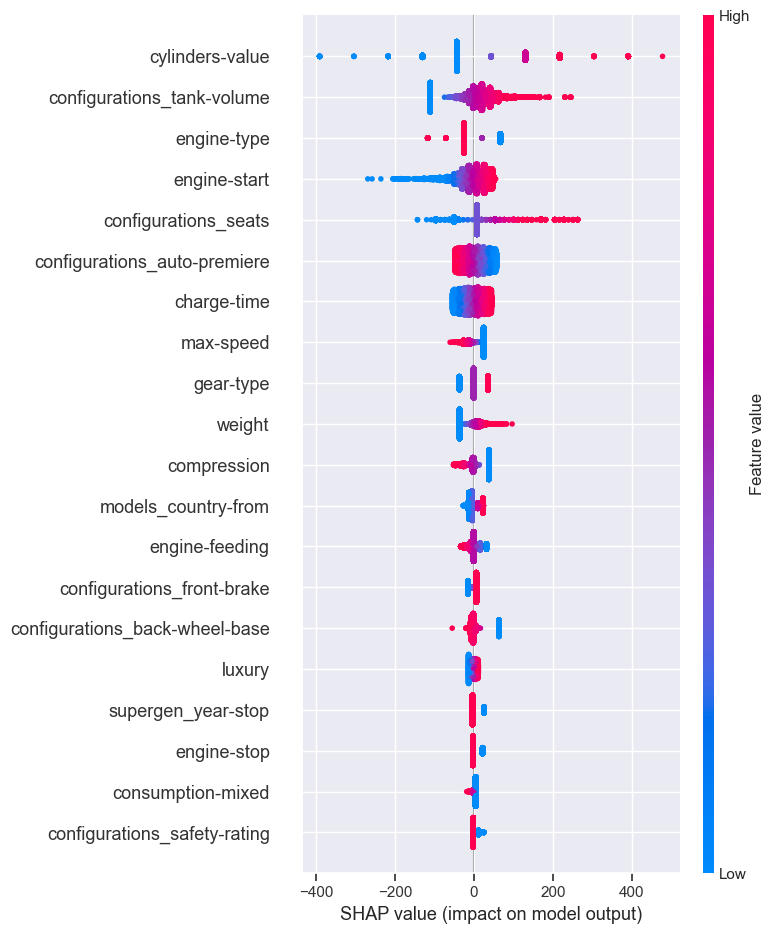

In [94]:
shap.summary_plot(shap_values, test_X)

**Чем выше признак, тем важнее. Увеличение cylinders_value положительно влияет на увеличение target**

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [95]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

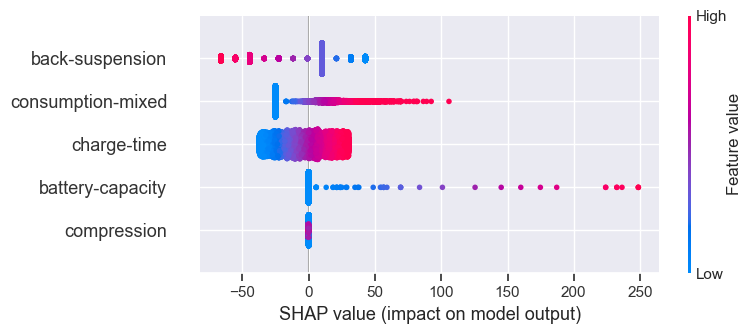

In [96]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

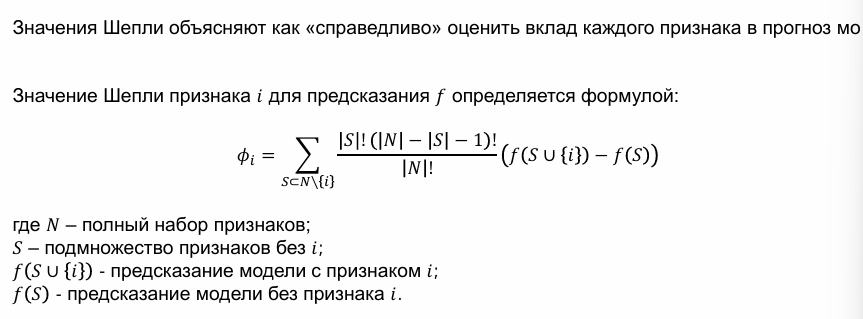

In [97]:
#перебираем все возможные размеры подмножества от 0 до s. Для каждого r создаем комбинации элементов 
def sets(iterable, i):
    s = list(iterable) 
    s.remove(i) 
    result = []
    for r in range(len(s) + 1):
        result.extend(combinations(s, r))
    return result

In [30]:
# sets(train_cut_X.columns, 'back-suspension')

In [98]:
shap = {}
#модель для каждой колонки (обучается на всем, кроме этой колонки). Это для оценки влияния остальных признаков
models = {col: LinearRegression().fit(train_cut_X.drop(col, axis=1), train_y) for col in train_cut_X.columns} 
N = len(train_cut_X.columns) #полный набор признаков

for i in train_cut_X.columns:
    shap_sum = 0
    S = list(sets(train_cut_X.columns, i)) #подмножество признаков без столбца i 
    score_full = LinearRegression().fit(train_cut_X, train_y).score(test_cut_X, test_y) #предсказание модели с признаком i
    score_partial = models[i].score(test_cut_X.drop(i, axis=1), test_y) #предсказание модели без признака i
    
    for subset in S:
        S_len = len(subset)
        shap_sum = (score_full - score_partial) * (f(S_len) * f(N - S_len - 1)) / f(N)
        shap[i] = shap_sum

In [99]:
print('Градация важности признаков по Шепли:')
sorted(shap.items(), key=lambda item: item[1], reverse=True)

Градация важности признаков по Шепли:


[('back-suspension', 0.0027368502584680155),
 ('consumption-mixed', 0.0016700644616282068),
 ('charge-time', 0.001133231572380211),
 ('battery-capacity', 0.0002681716457339389),
 ('compression', 9.576721507364993e-07)]

## Пермутационная важность

In [100]:
import eli5
from eli5.sklearn import PermutationImportance

In [101]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [102]:
perm = PermutationImportance(reg, random_state=42).fit(test_cut_X, test_y)

In [103]:
eli5.show_weights(perm, feature_names=list(train_cut_X.columns))

Weight,Feature
0.0310 ± 0.0033,back-suspension
0.0187 ± 0.0022,consumption-mixed
0.0118 ± 0.0021,charge-time
0.0026 ± 0.0001,battery-capacity
0.0000 ± 0.0000,compression


### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

**Вариант 1: с использованием permutation_importance**

In [104]:
from sklearn.inspection import permutation_importance

In [105]:
model = LinearRegression().fit(train_cut_X, train_y)

perm_importance = permutation_importance(model, test_cut_X, test_y, random_state=42)
importance_df = pd.DataFrame({
    'Weight': perm_importance.importances_mean,
    'Feature': test_cut_X.columns})
sorted_importance_df = importance_df.sort_values(by='Weight', ascending=False)
sorted_importance_df

,Weight,Feature
0,0.030711,back-suspension
4,0.016955,consumption-mixed
2,0.012441,charge-time
1,0.002123,battery-capacity
3,0.000004,compression


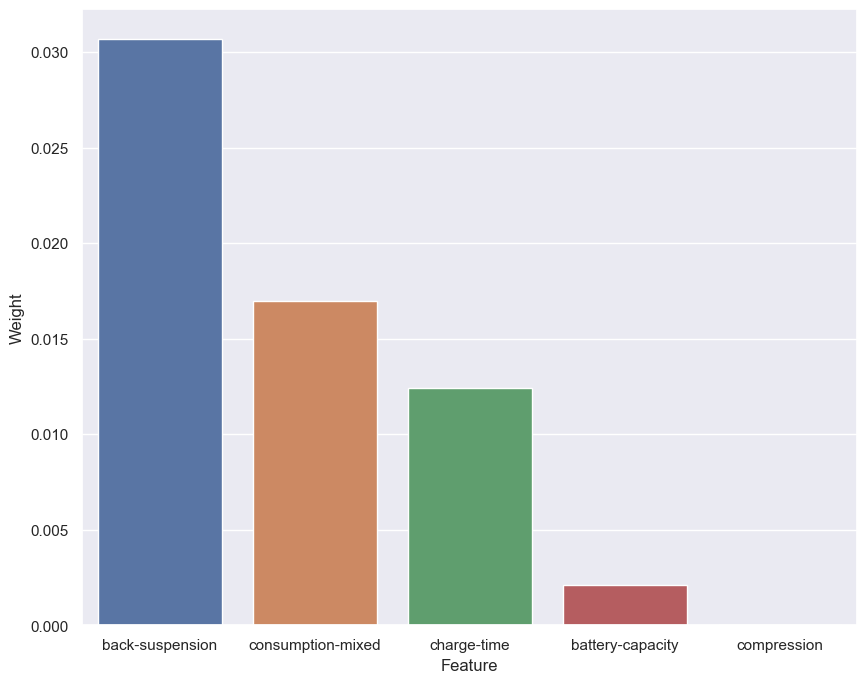

In [106]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature', y='Weight', data=sorted_importance_df)
plt.show()

**Вариант 2: через алгоритм**

In [107]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [108]:
model = LinearRegression().fit(train_cut_X, train_y)
initial_pred = model.predict(test_cut_X)
initial_mse = mean_squared_error(test_y, initial_pred)

importance = {}

for col in test_cut_X.columns:
    test_X_permuted = test_cut_X.copy()
    test_X_permuted[col] = np.random.permutation(test_X_permuted[col])
    permuted_pred = model.predict(test_X_permuted)
    permuted_mse = mean_squared_error(test_y, permuted_pred)
    
    importance[col] = permuted_mse - initial_mse
    
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
sorted_importance

[('back-suspension', 1950.5977104145568),
 ('consumption-mixed', 1154.129983015926),
 ('charge-time', 717.8023152496899),
 ('battery-capacity', 132.5017344328371),
 ('compression', 0.2458640770491911)]